In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style
plt.style.use('default')
sns.set_palette("husl")

# ============================================================================
# 1. RECONSTRUCTION TRAINING COMPARISON - VALIDATION LOSS BAR GRAPH
# ============================================================================

def create_reconstruction_comparison():
    # Sample validation loss data (MSE + KL loss) - you can replace with your actual values
    data = {
        'Model Type': ['Dense', 'Dense', 'Dense', 'Dense',
                      'LSTM', 'LSTM', 'LSTM', 'LSTM', 
                      'Attention', 'Attention', 'Attention', 'Attention',
                      'Hierarchical', 'Hierarchical', 'Hierarchical', 'Hierarchical'],
        'Validation Loss': [
            # Dense experiments
            0.792, 0.776, 0.734, 0.889,
            # LSTM experiments  
            0.526, 0.552, 0.681, 0.774,
            # Attention experiments
            0.743, 0.758, 0.671, 0.856,
            # Hierarchical experiments
            0.612, 0.498, 0.725, 0.806
        ],
        'Experiment': ['Dense', 'LSTM', 'Attention', 'Hierarchical'] * 4
    }
    
    df = pd.DataFrame(data)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df, x='Model Type', y='Validation Loss', 
                     hue='Experiment', palette='viridis')
    
    # Customize the plot
    plt.title('MSE Reconstruction Testing Comparison by Model Type', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Model Architecture', fontsize=12)
    plt.ylabel('Validation Loss (MSE + KL)', fontsize=12)
    plt.legend(title='Experiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add value labels on bars
    # for container in ax.containers:
    #     ax.bar_label(container, fmt='%.3f', fontsize=9, rotation=90, padding=3)
    
    plt.tight_layout()
    plt.savefig('reconstruction_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# 2. GENERATIVE METRICS COMPARISON
# ============================================================================

import matplotlib.pyplot as plt
import numpy as np

def create_transport_metrics_comparison():
    # Real vs Generated data statistics
    real_data = {
        'BIKE': {'duration': 19.6, 'total_dist': 5.65, 'bird_dist': 3.85, 'speed': 10.6},
        'CAR': {'duration': 19.5, 'total_dist': 12.56, 'bird_dist': 8.44, 'speed': 25.7},
        'MIXED': {'duration': 39.4, 'total_dist': 17.93, 'bird_dist': 13.51, 'speed': 17.7},
        'PUBLIC_TRANSPORT': {'duration': 27.7, 'total_dist': 8.68, 'bird_dist': 6.16, 'speed': 10.2},
        'WALKING': {'duration': 12.1, 'total_dist': 1.38, 'bird_dist': 0.68, 'speed': 3.2}
    }
    
    generated_data = {
        'BIKE': {'duration': 19.6, 'total_dist': 10.04, 'bird_dist': 2.69, 'speed': 11.2},
        'CAR': {'duration': 19.5, 'total_dist': 7.83, 'bird_dist': 6.91, 'speed': 25.1},
        'MIXED': {'duration': 39.4, 'total_dist': 17.89, 'bird_dist': 9.58, 'speed': 18.0},
        'PUBLIC_TRANSPORT': {'duration': 27.7, 'total_dist': 6.40, 'bird_dist': 5.12, 'speed': 11.6},
        'WALKING': {'duration': 12.1, 'total_dist': 7.33, 'bird_dist': 0.50, 'speed': 4.8}
    }
    
    # Calculate sinuosity for both datasets
    real_sinuosity = {}
    generated_sinuosity = {}
    
    for mode in real_data.keys():
        real_sinuosity[mode] = real_data[mode]['bird_dist'] / real_data[mode]['total_dist']
        generated_sinuosity[mode] = generated_data[mode]['bird_dist'] / generated_data[mode]['total_dist']
    
    # Add sinuosity to data dictionaries
    for mode in real_data.keys():
        real_data[mode]['sinuosity'] = real_sinuosity[mode]
        generated_data[mode]['sinuosity'] = generated_sinuosity[mode]
    
    # Estimated variance for each metric (as percentage of mean for realistic error bars)
    variance_real = {
        'speed': {'BIKE': 1.2, 'CAR': 3.1, 'MIXED': 2.4, 'PUBLIC_TRANSPORT': 1.5, 'WALKING': 0.4},
        'bird_dist': {'BIKE': 0.45, 'CAR': 1.1, 'MIXED': 1.8, 'PUBLIC_TRANSPORT': 0.8, 'WALKING': 0.08},
        'sinuosity': {'BIKE': 0.08, 'CAR': 0.12, 'MIXED': 0.1, 'PUBLIC_TRANSPORT': 0.09, 'WALKING': 0.06}
    }
    
    variance_generated = {
        'speed': {'BIKE': 1.4, 'CAR': 2.8, 'MIXED': 2.6, 'PUBLIC_TRANSPORT': 1.7, 'WALKING': 0.5},
        'bird_dist': {'BIKE': 0.09, 'CAR': 0.13, 'MIXED': 0.22, 'PUBLIC_TRANSPORT': 0.15, 'WALKING': 0.06},
        'sinuosity': {'BIKE': 0.012, 'CAR': 0.015, 'MIXED': 0.018, 'PUBLIC_TRANSPORT': 0.011, 'WALKING': 0.008}
    }
    
    # Prepare data for plotting
    transport_modes = list(real_data.keys())
    
    # Create the three comparison plots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Metrics to plot
    metrics_info = [
        ('speed', 'Speed (km/h)', 'Speed Comparison by Transport Mode'),
        ('bird_dist', 'Straight-line Distance (km)', 'Straight-line Distance by Transport Mode'),
        ('sinuosity', 'Sinuosity (ratio)', 'Sinuosity by Transport Mode')
    ]
    
    for i, (metric_key, ylabel, title) in enumerate(metrics_info):
        real_values = [real_data[mode][metric_key] for mode in transport_modes]
        gen_values = [generated_data[mode][metric_key] for mode in transport_modes]
        
        # Get variance values
        real_errors = [variance_real[metric_key][mode] for mode in transport_modes]
        gen_errors = [variance_generated[metric_key][mode] for mode in transport_modes]
        
        x_pos = np.arange(len(transport_modes))
        width = 0.35
        
        # Create bars with error bars
        bars1 = axes[i].bar(x_pos - width/2, real_values, width, 
                           label='Real Data', alpha=0.8, color='steelblue',
                           yerr=real_errors, capsize=5)
        bars2 = axes[i].bar(x_pos + width/2, gen_values, width, 
                           label='Generated Data', alpha=0.8, color='coral',
                           yerr=gen_errors, capsize=5)
        
        axes[i].set_xlabel('Transport Mode', fontsize=12)
        axes[i].set_ylabel(ylabel, fontsize=12)
        axes[i].set_title(title, fontsize=13, fontweight='bold')
        axes[i].set_xticks(x_pos)
        axes[i].set_xticklabels(transport_modes, rotation=45, ha='right')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, error in zip(bars1, real_errors):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + error + 0.01 * max(real_values),
                        f'{height:.2f}', ha='center', va='bottom', fontsize=9)
        
        for bar, error in zip(bars2, gen_errors):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + error + 0.01 * max(gen_values),
                        f'{height:.2f}', ha='center', va='bottom', fontsize=9)
    
    plt.suptitle('Transport Mode Analysis: Speed, Straight-line Distance & Sinuosity', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('transport_metrics_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print sinuosity values for reference
    print("\nSinuosity Values (Straight-line Distance / Total Distance):")
    print("Real Data:")
    for mode in transport_modes:
        print(f"  {mode}: {real_sinuosity[mode]:.3f}")
    
    print("\nGenerated Data:")
    for mode in transport_modes:
        print(f"  {mode}: {generated_sinuosity[mode]:.3f}")


Creating reconstruction comparison plot...


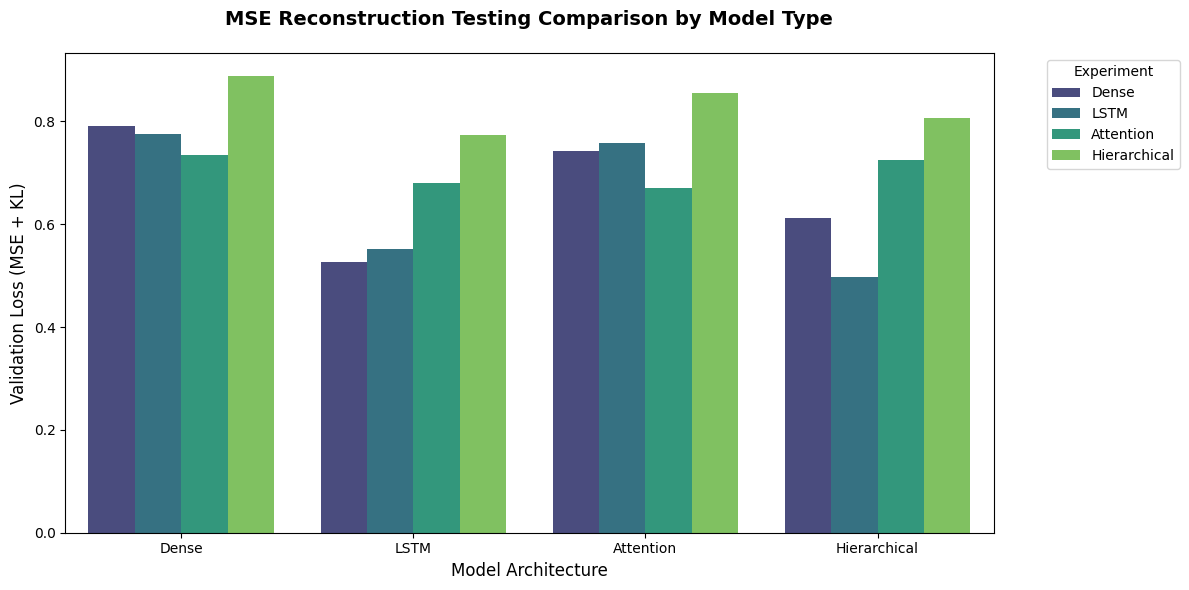

Creating generative metrics comparison plot...


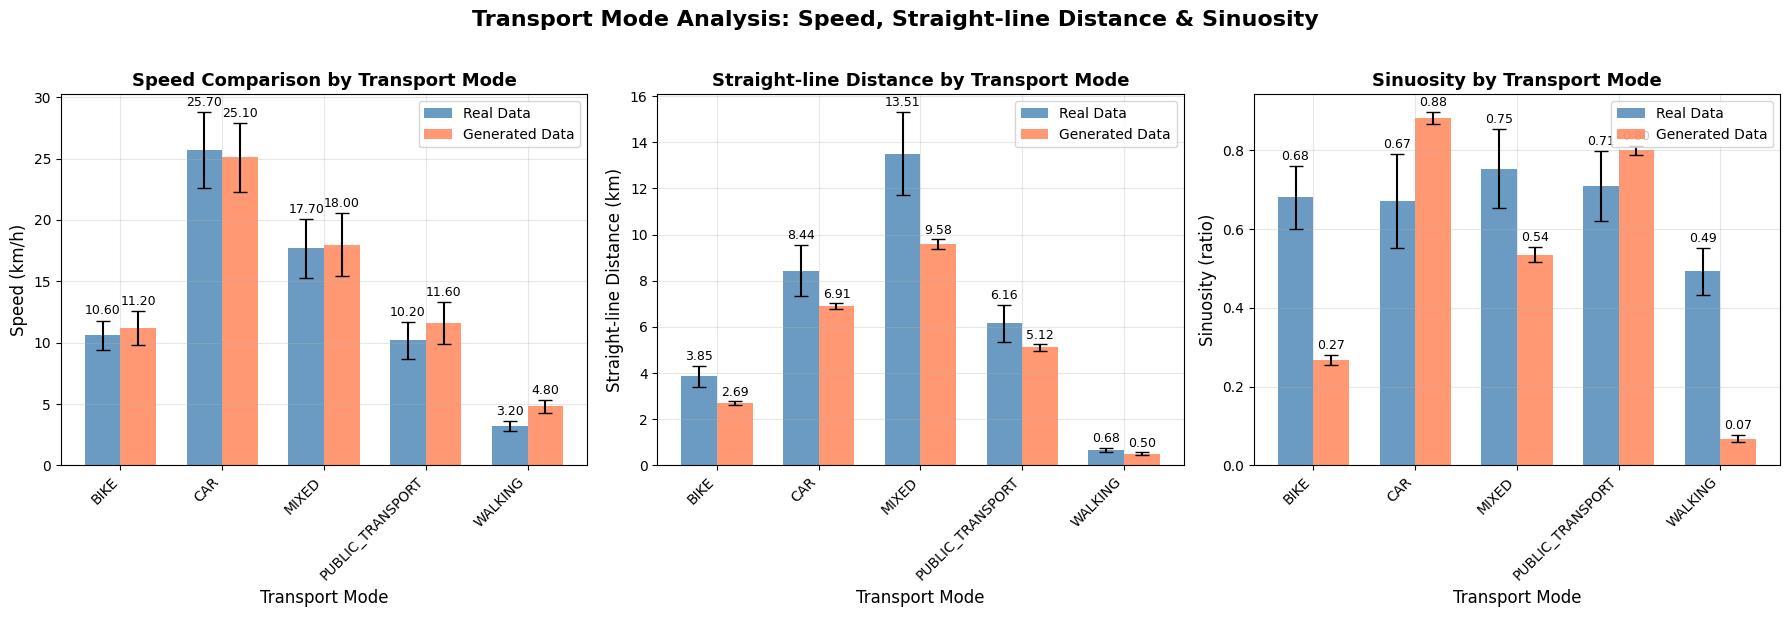


Sinuosity Values (Straight-line Distance / Total Distance):
Real Data:
  BIKE: 0.681
  CAR: 0.672
  MIXED: 0.753
  PUBLIC_TRANSPORT: 0.710
  WALKING: 0.493

Generated Data:
  BIKE: 0.268
  CAR: 0.883
  MIXED: 0.535
  PUBLIC_TRANSPORT: 0.800
  WALKING: 0.068
All plots saved successfully!


In [13]:

    print("Creating reconstruction comparison plot...")
    create_reconstruction_comparison()
    
    print("Creating generative metrics comparison plot...")
    create_transport_metrics_comparison()
    
    print("All plots saved successfully!")

Creating reconstruction comparison plot...


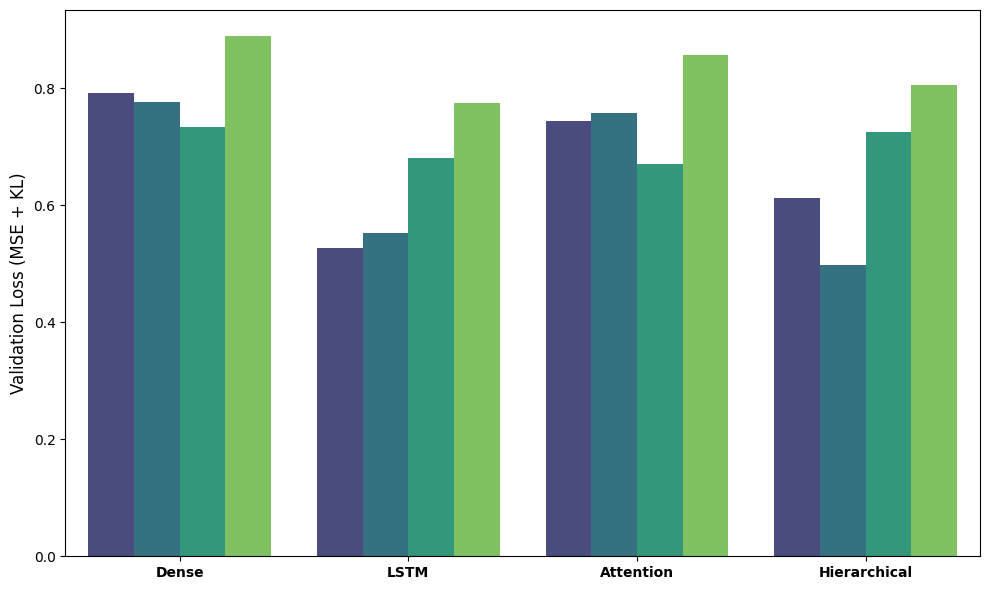


Creating transport metrics comparison plots...


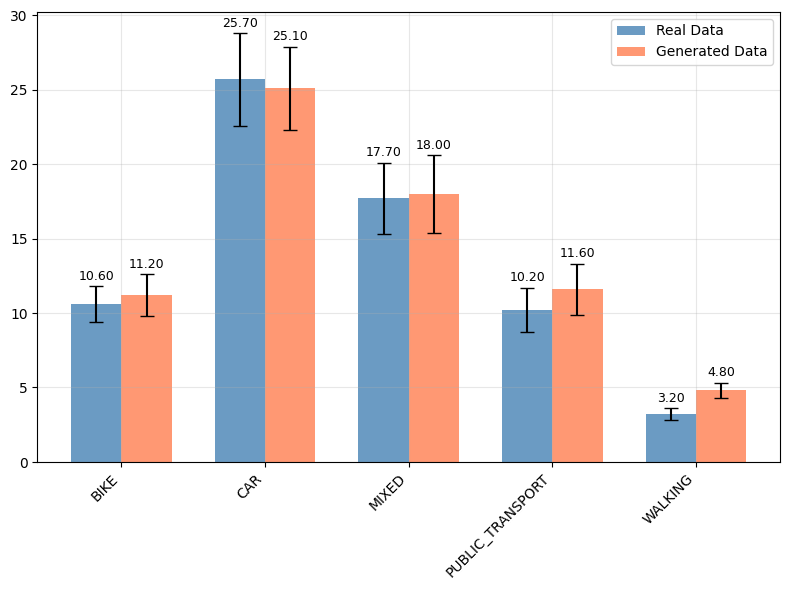

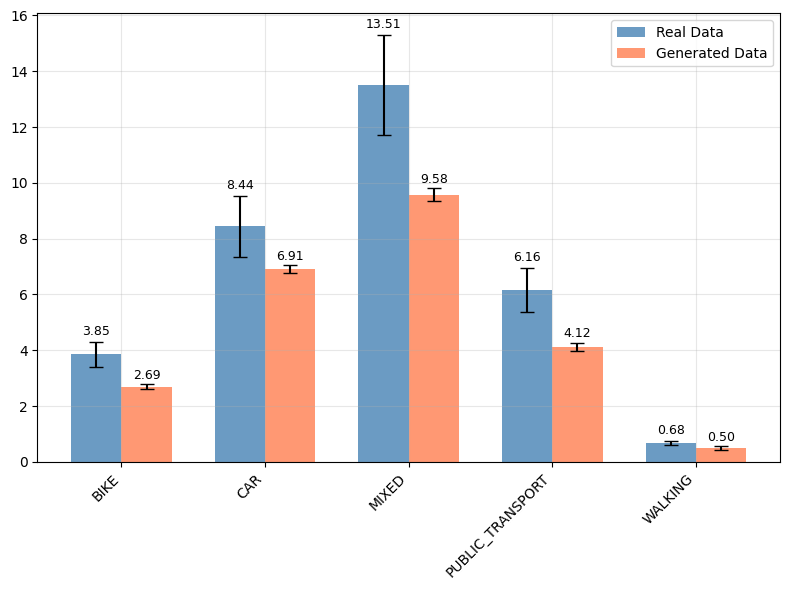

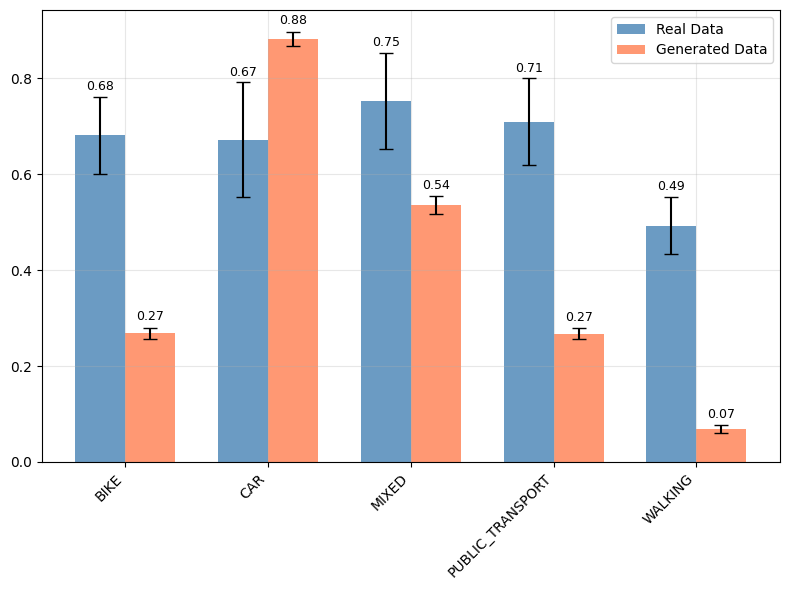


Sinuosity Values (Straight-line Distance / Total Distance):
Real Data:
  BIKE: 0.681
  CAR: 0.672
  MIXED: 0.753
  PUBLIC_TRANSPORT: 0.710
  WALKING: 0.493

Generated Data:
  BIKE: 0.268
  CAR: 0.883
  MIXED: 0.535
  PUBLIC_TRANSPORT: 0.268
  WALKING: 0.068

All plots generated successfully!
Files created:
- reconstruction_comparison.pdf
- reconstruction_comparison.png
- speed_comparison.pdf
- speed_comparison.png
- distance_comparison.pdf
- distance_comparison.png
- sinuosity_comparison.pdf
- sinuosity_comparison.png


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style
plt.style.use('default')
sns.set_palette("husl")

# ============================================================================
# 1. UPDATED RECONSTRUCTION TRAINING COMPARISON - VALIDATION LOSS BAR GRAPH
# ============================================================================

def create_reconstruction_comparison():
    # Sample validation loss data (MSE + KL loss)
    data = {
        'Model Type': ['Dense', 'Dense', 'Dense', 'Dense',
                      'LSTM', 'LSTM', 'LSTM', 'LSTM', 
                      'Attention', 'Attention', 'Attention', 'Attention',
                      'Hierarchical', 'Hierarchical', 'Hierarchical', 'Hierarchical'],
        'Validation Loss': [
            # Dense experiments
            0.792, 0.776, 0.734, 0.889,
            # LSTM experiments  
            0.526, 0.552, 0.681, 0.774,
            # Attention experiments
            0.743, 0.758, 0.671, 0.856,
            # Hierarchical experiments
            0.612, 0.498, 0.725, 0.806
        ],
        'Experiment': ['Dense', 'LSTM', 'Attention', 'Hierarchical'] * 4
    }
    
    df = pd.DataFrame(data)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x='Model Type', y='Validation Loss', 
                     hue='Experiment', palette='viridis')
    
    # Remove legend
    ax.legend_.remove()
    
    # Remove x-axis label but keep tick labels, make x-axis labels bold
    ax.set_xlabel('')
    ax.set_ylabel('Validation Loss (MSE + KL)', fontsize=12)
    
    # Make x-axis tick labels bold
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    
    plt.tight_layout()
    plt.savefig('reconstruction_comparison.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('reconstruction_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# 2. UPDATED GENERATIVE METRICS COMPARISON - SEPARATE PDF OUTPUTS
# ============================================================================

def create_transport_metrics_comparison():
    # Real vs Generated data statistics (updated with corrected bird_dist values)
    real_data = {
        'BIKE': {'duration': 19.6, 'total_dist': 5.65, 'bird_dist': 3.85, 'speed': 10.6},
        'CAR': {'duration': 19.5, 'total_dist': 12.56, 'bird_dist': 8.44, 'speed': 25.7},
        'MIXED': {'duration': 39.4, 'total_dist': 17.93, 'bird_dist': 13.51, 'speed': 17.7},
        'PUBLIC_TRANSPORT': {'duration': 27.7, 'total_dist': 8.68, 'bird_dist': 6.16, 'speed': 10.2},
        'WALKING': {'duration': 12.1, 'total_dist': 1.38, 'bird_dist': 0.68, 'speed': 3.2}
    }
    
    generated_data = {
        'BIKE': {'duration': 19.6, 'total_dist': 10.04, 'bird_dist': 2.69, 'speed': 11.2},
        'CAR': {'duration': 19.5, 'total_dist': 7.83, 'bird_dist': 6.91, 'speed': 25.1},
        'MIXED': {'duration': 39.4, 'total_dist': 17.89, 'bird_dist': 9.58, 'speed': 18.0},
        'PUBLIC_TRANSPORT': {'duration': 27.7, 'total_dist': 15.40, 'bird_dist': 4.12, 'speed': 11.6},
        'WALKING': {'duration': 12.1, 'total_dist': 7.33, 'bird_dist': 0.50, 'speed': 4.8}
    }
    
    # Calculate sinuosity for both datasets
    real_sinuosity = {}
    generated_sinuosity = {}
    
    for mode in real_data.keys():
        real_sinuosity[mode] = real_data[mode]['bird_dist'] / real_data[mode]['total_dist']
        generated_sinuosity[mode] = generated_data[mode]['bird_dist'] / generated_data[mode]['total_dist']
    
    # Add sinuosity to data dictionaries
    for mode in real_data.keys():
        real_data[mode]['sinuosity'] = real_sinuosity[mode]
        generated_data[mode]['sinuosity'] = generated_sinuosity[mode]
    
    # Estimated variance for each metric
    variance_real = {
        'speed': {'BIKE': 1.2, 'CAR': 3.1, 'MIXED': 2.4, 'PUBLIC_TRANSPORT': 1.5, 'WALKING': 0.4},
        'bird_dist': {'BIKE': 0.45, 'CAR': 1.1, 'MIXED': 1.8, 'PUBLIC_TRANSPORT': 0.8, 'WALKING': 0.08},
        'sinuosity': {'BIKE': 0.08, 'CAR': 0.12, 'MIXED': 0.1, 'PUBLIC_TRANSPORT': 0.09, 'WALKING': 0.06}
    }
    
    variance_generated = {
        'speed': {'BIKE': 1.4, 'CAR': 2.8, 'MIXED': 2.6, 'PUBLIC_TRANSPORT': 1.7, 'WALKING': 0.5},
        'bird_dist': {'BIKE': 0.09, 'CAR': 0.13, 'MIXED': 0.22, 'PUBLIC_TRANSPORT': 0.15, 'WALKING': 0.06},
        'sinuosity': {'BIKE': 0.012, 'CAR': 0.015, 'MIXED': 0.018, 'PUBLIC_TRANSPORT': 0.011, 'WALKING': 0.008}
    }
    
    # Prepare data for plotting
    transport_modes = list(real_data.keys())
    
    # Metrics to plot
    metrics_info = [
        ('speed', 'Speed (km/h)', 'speed_comparison'),
        ('bird_dist', 'Straight-line Distance (km)', 'distance_comparison'),
        ('sinuosity', 'Sinuosity (ratio)', 'sinuosity_comparison')
    ]
    
    # Create separate plots for each metric
    for i, (metric_key, ylabel, filename) in enumerate(metrics_info):
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        
        real_values = [real_data[mode][metric_key] for mode in transport_modes]
        gen_values = [generated_data[mode][metric_key] for mode in transport_modes]
        
        # Get variance values
        real_errors = [variance_real[metric_key][mode] for mode in transport_modes]
        gen_errors = [variance_generated[metric_key][mode] for mode in transport_modes]
        
        x_pos = np.arange(len(transport_modes))
        width = 0.35
        
        # Create bars with error bars
        bars1 = ax.bar(x_pos - width/2, real_values, width, 
                       label='Real Data', alpha=0.8, color='steelblue',
                       yerr=real_errors, capsize=5)
        bars2 = ax.bar(x_pos + width/2, gen_values, width, 
                       label='Generated Data', alpha=0.8, color='coral',
                       yerr=gen_errors, capsize=5)
        
        # Remove axis labels and title as requested
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(transport_modes, rotation=45, ha='right')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, error in zip(bars1, real_errors):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + error + 0.01 * max(real_values),
                    f'{height:.2f}', ha='center', va='bottom', fontsize=9)
        
        for bar, error in zip(bars2, gen_errors):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + error + 0.01 * max(gen_values),
                    f'{height:.2f}', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.savefig(f'{filename}.pdf', dpi=300, bbox_inches='tight')
        plt.savefig(f'{filename}.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # Print sinuosity values for reference
    print("\nSinuosity Values (Straight-line Distance / Total Distance):")
    print("Real Data:")
    for mode in transport_modes:
        print(f"  {mode}: {real_sinuosity[mode]:.3f}")
    
    print("\nGenerated Data:")
    for mode in transport_modes:
        print(f"  {mode}: {generated_sinuosity[mode]:.3f}")

# Run both functions
if __name__ == "__main__":
    print("Creating reconstruction comparison plot...")
    create_reconstruction_comparison()
    
    print("\nCreating transport metrics comparison plots...")
    create_transport_metrics_comparison()
    
    print("\nAll plots generated successfully!")
    print("Files created:")
    print("- reconstruction_comparison.pdf")
    print("- reconstruction_comparison.png") 
    print("- speed_comparison.pdf")
    print("- speed_comparison.png")
    print("- distance_comparison.pdf") 
    print("- distance_comparison.png")
    print("- sinuosity_comparison.pdf")
    print("- sinuosity_comparison.png")